# 0. Install and Import Dependencies

In [ ]:
!pip install neuralprophet

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 748.8MB 21kB/s 
     |████████████████████████████████| 81kB 3.6MB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# 1. Read in Data and Process Dates

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/some projects/datasets/waterconsumption_modified.csv')
df.head()

,Code_Year_Month,Postal_Code,Customer_Class,Total_Gallons,Unnamed: 4
0,25-10-19,78613.0,Multi-Family,23000.0,NaN
1,24-10-13,78613.0,Irrigation - Multi-Family,11000.0,NaN
2,09-02-11,78617.0,Multi-Family,2477000.0,NaN
3,17-04-19,78617.0,Residential,19962500.0,NaN
4,24-03-18,78652.0,Irrigation - Residential,38500.0,NaN


In [ ]:
df.columns

Index(['Code_Year_Month', 'Postal_Code', 'Customer_Class', 'Total_Gallons',
       'Unnamed: 4'],
      dtype='object')

In [ ]:
df['Customer_Class'].unique()

array(['Multi-Family', 'Irrigation - Multi-Family', 'Residential',
       'Irrigation - Residential', nan], dtype=object)

In [ ]:
df.dtypes

Code_Year_Month     object
Postal_Code        float64
Customer_Class      object
Total_Gallons      float64
Unnamed: 4         float64
dtype: object

In [ ]:
Residential=df[df['Customer_Class']=='Residential']
Residential['Code_Year_Month']=pd.to_datetime(Residential['Code_Year_Month'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Residential.dtypes

Code_Year_Month    datetime64[ns]
Postal_Code               float64
Customer_Class             object
Total_Gallons             float64
Unnamed: 4                float64
dtype: object

In [ ]:
Residential.head()

,Code_Year_Month,Postal_Code,Customer_Class,Total_Gallons,Unnamed: 4
3,2019-04-17,78617.0,Residential,19962500.0,NaN
5,2018-08-01,78652.0,Residential,632300.0,NaN
8,2009-10-09,78653.0,Residential,2577800.0,NaN
9,2010-09-12,78660.0,Residential,7226400.0,NaN
13,2014-10-07,78701.0,Residential,1180900.0,NaN


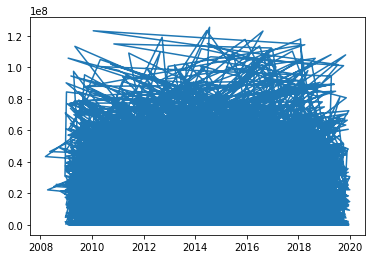

In [ ]:
plt.plot(Residential['Code_Year_Month'],Residential['Total_Gallons'])
plt.show()

In [ ]:
data = Residential[['Code_Year_Month', 'Total_Gallons']]
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
3,2019-04-17,19962500.0
5,2018-08-01,632300.0
8,2009-10-09,2577800.0
9,2010-09-12,7226400.0
13,2014-10-07,1180900.0


In [ ]:
data

,ds,y
3,2019-04-17,19962500.0
5,2018-08-01,632300.0
8,2009-10-09,2577800.0
9,2010-09-12,7226400.0
13,2014-10-07,1180900.0
...,...,...
11114,2014-01-29,1208800.0
11118,2016-12-01,10314400.0
11122,2011-09-16,18783300.0
11126,2017-04-13,8611500.0


# 2. Train Model

In [ ]:
m = NeuralProphet()

In [ ]:
model = m.fit(data, freq='D', epochs=1000)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [03:05<00:00,  5.39it/s, SmoothL1Loss=0.0504, MAE=1.93e+7, RegLoss=0]


# 3. Forecast Away

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-12-30,None,30210128.0,NaN,26273256.0,2701474.75,1.235398e+06
1,2019-12-31,None,25781232.0,NaN,26272096.0,2808517.25,-3.299381e+06
2,2020-01-01,None,29516236.0,NaN,26270932.0,2906597.75,3.387094e+05
3,2020-01-02,None,29820064.0,NaN,26269764.0,2995017.75,5.552814e+05
4,2020-01-03,None,29984376.0,NaN,26268600.0,3073127.25,6.426466e+05


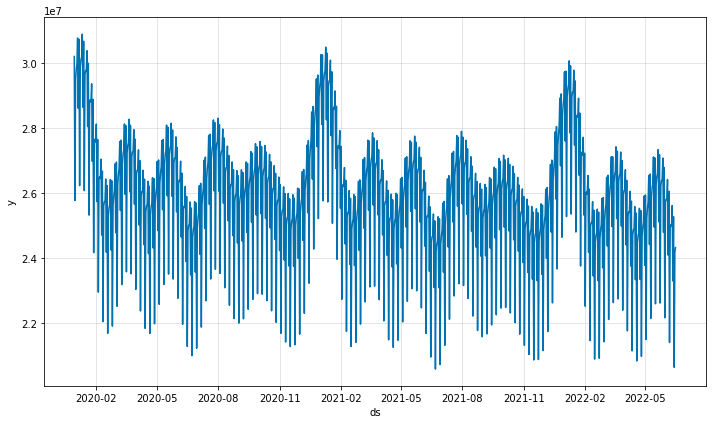

In [ ]:
plot1 = m.plot(forecast)

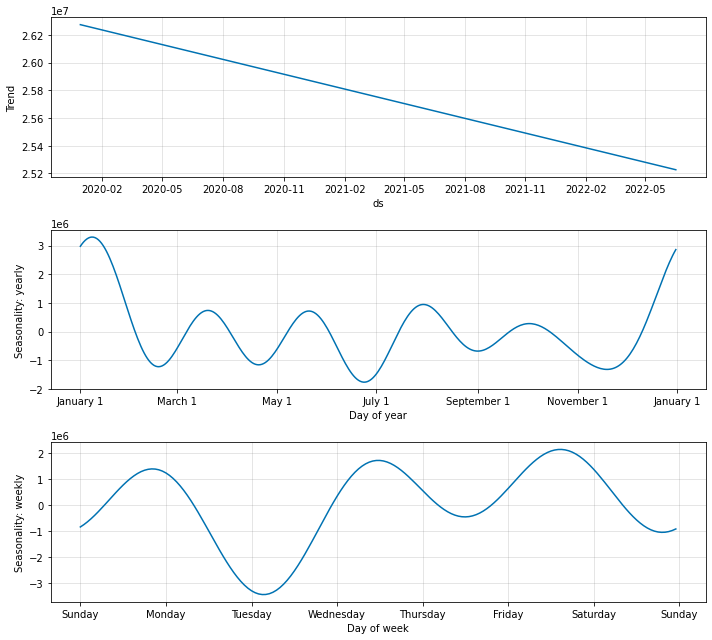

In [ ]:
plt2 = m.plot_components(forecast)

# 4. Save Model

In [ ]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-12-30,None,30210128.0,NaN,26273256.0,2701474.75,1.235398e+06
1,2019-12-31,None,25781232.0,NaN,26272096.0,2808517.25,-3.299381e+06
2,2020-01-01,None,29516236.0,NaN,26270932.0,2906597.75,3.387094e+05
3,2020-01-02,None,29820064.0,NaN,26269764.0,2995017.75,5.552814e+05
4,2020-01-03,None,29984376.0,NaN,26268600.0,3073127.25,6.426466e+05


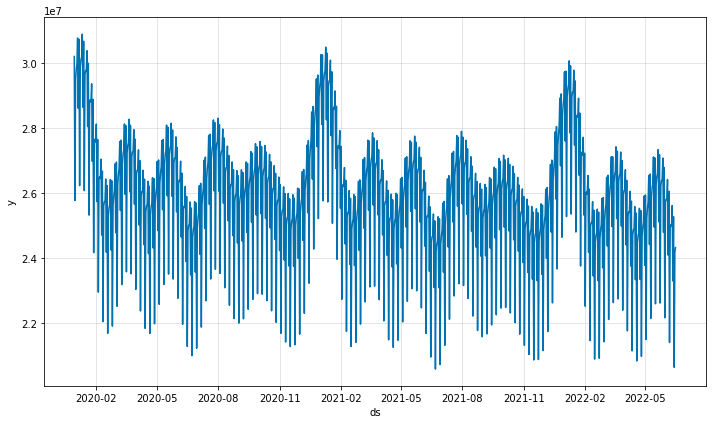

In [ ]:
plot1 = m.plot(forecast)